<a href="https://colab.research.google.com/github/JuanRosales707/md-lab01-RC/blob/main/LAB_05_MD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os
import pandas as pd

### **a. Por medio de la librería 'Pandas', lea la base de datos, separe las variables numéricas de las no numéricas tomando en cuenta la información que se encuentra en el repositorio, calcule sus estadísticos descriptivos y halle la matriz de correlación.**

In [2]:
# Ruta del archivo y carpeta de extracción
zip_path = "/content/drive/MyDrive/5to_Ciclo/breast+cancer+wisconsin+original.zip"
extract_path = "/content/breast_cancer_data"

In [3]:
# Descomprimir
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
# Ver archivos descomprimidos
os.listdir(extract_path)

['wpbc.names',
 'breast-cancer-wisconsin.data',
 'wdbc.names',
 'unformatted-data',
 'breast-cancer-wisconsin.names',
 'Index',
 'wdbc.data',
 'wpbc.data']

In [5]:
# Cargar el dataset
file_path = os.path.join(extract_path, "breast-cancer-wisconsin.data")

# Asignar nombres de columnas basados en el repositorio original
column_names = ['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size',
                'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size',
                'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

# Leer el archivo
df = pd.read_csv(file_path, names=column_names)

In [6]:
# Ver las primeras filas
df.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
# Ver tipos de datos
df.dtypes

# Cambiar posibles valores '?' en 'Bare_Nuclei' y convertirlo a numérico
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

# Separar variables
numeric_vars = df.select_dtypes(include='number')
non_numeric_vars = df.select_dtypes(exclude='number')

In [8]:
# Mostrar
print("Variables numéricas:", numeric_vars.columns.tolist())
print("Variables no numéricas:", non_numeric_vars.columns.tolist())

Variables numéricas: ['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
Variables no numéricas: []


In [9]:
# Estadísticos descriptivos
numeric_vars.describe()


,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [10]:
# Matriz de correlación
correlation_matrix = numeric_vars.corr()
correlation_matrix

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Sample_code_number,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.099248,-0.060051,-0.052072,-0.034901,-0.080226
Clump_Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.593091,0.558428,0.535835,0.350034,0.716001
Uniformity_of_Cell_Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.691709,0.755721,0.722865,0.458693,0.817904
Uniformity_of_Cell_Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.713878,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.670648,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.585716,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland_Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.680615,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.584280,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.339210,0.344169,0.428336,1.000000,0.423170


### **b.Por medio de la librería 'Matplotlib', elabore histogramas, gráficos de densidad, box plot y diagramas de dispersión incluyendo diversos parámetros para estos.**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
sns.set(style="whitegrid")


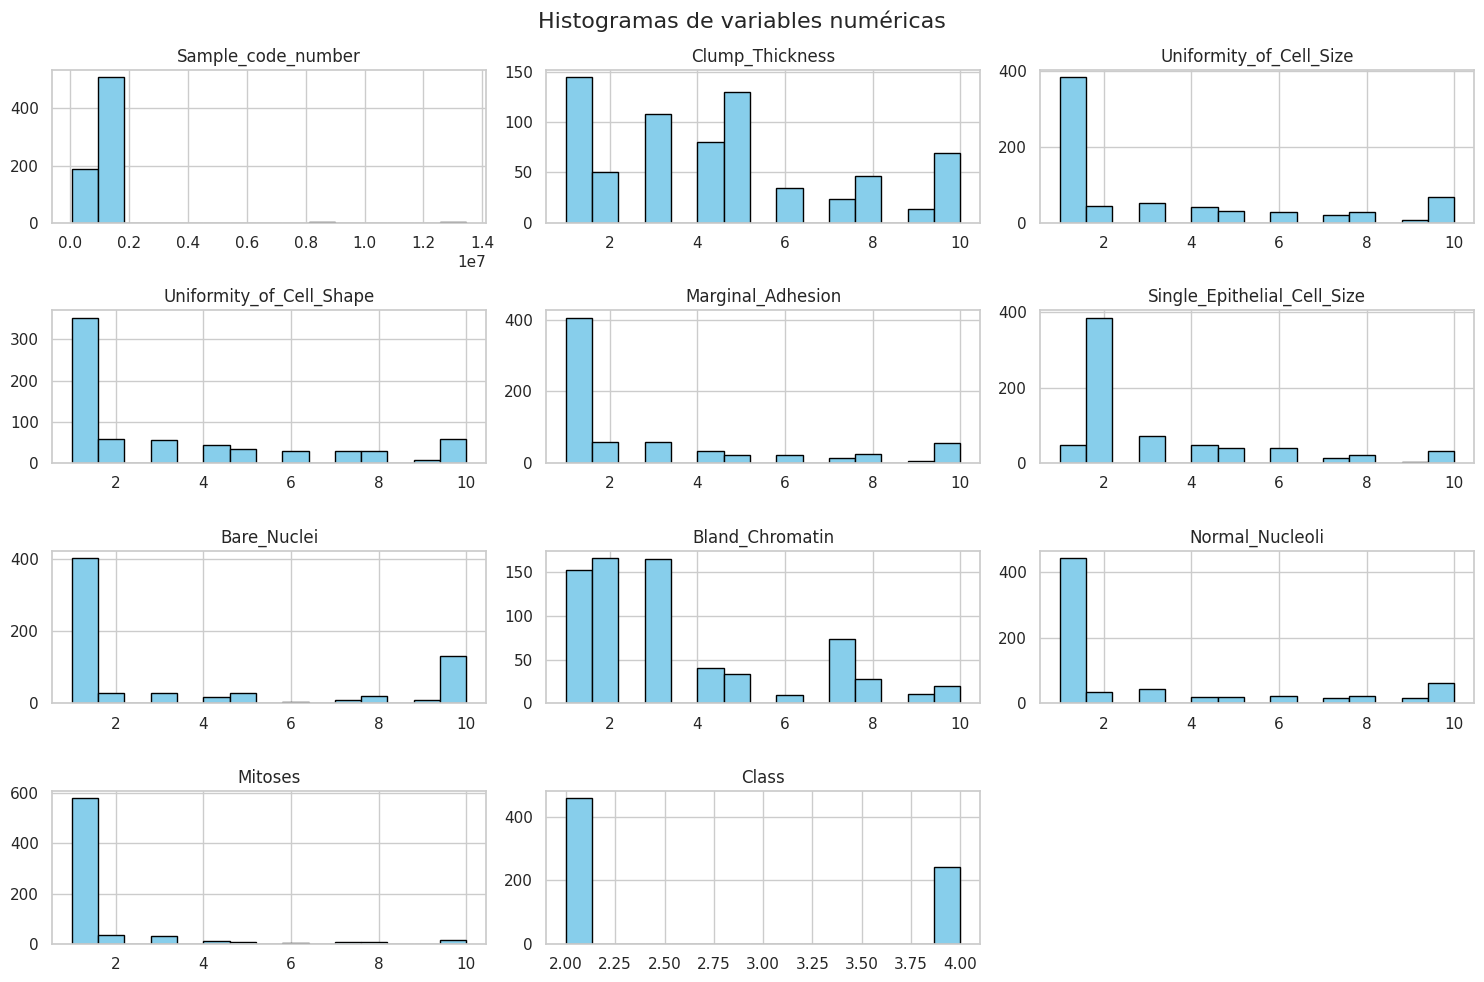

In [12]:
numeric_vars.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogramas de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()


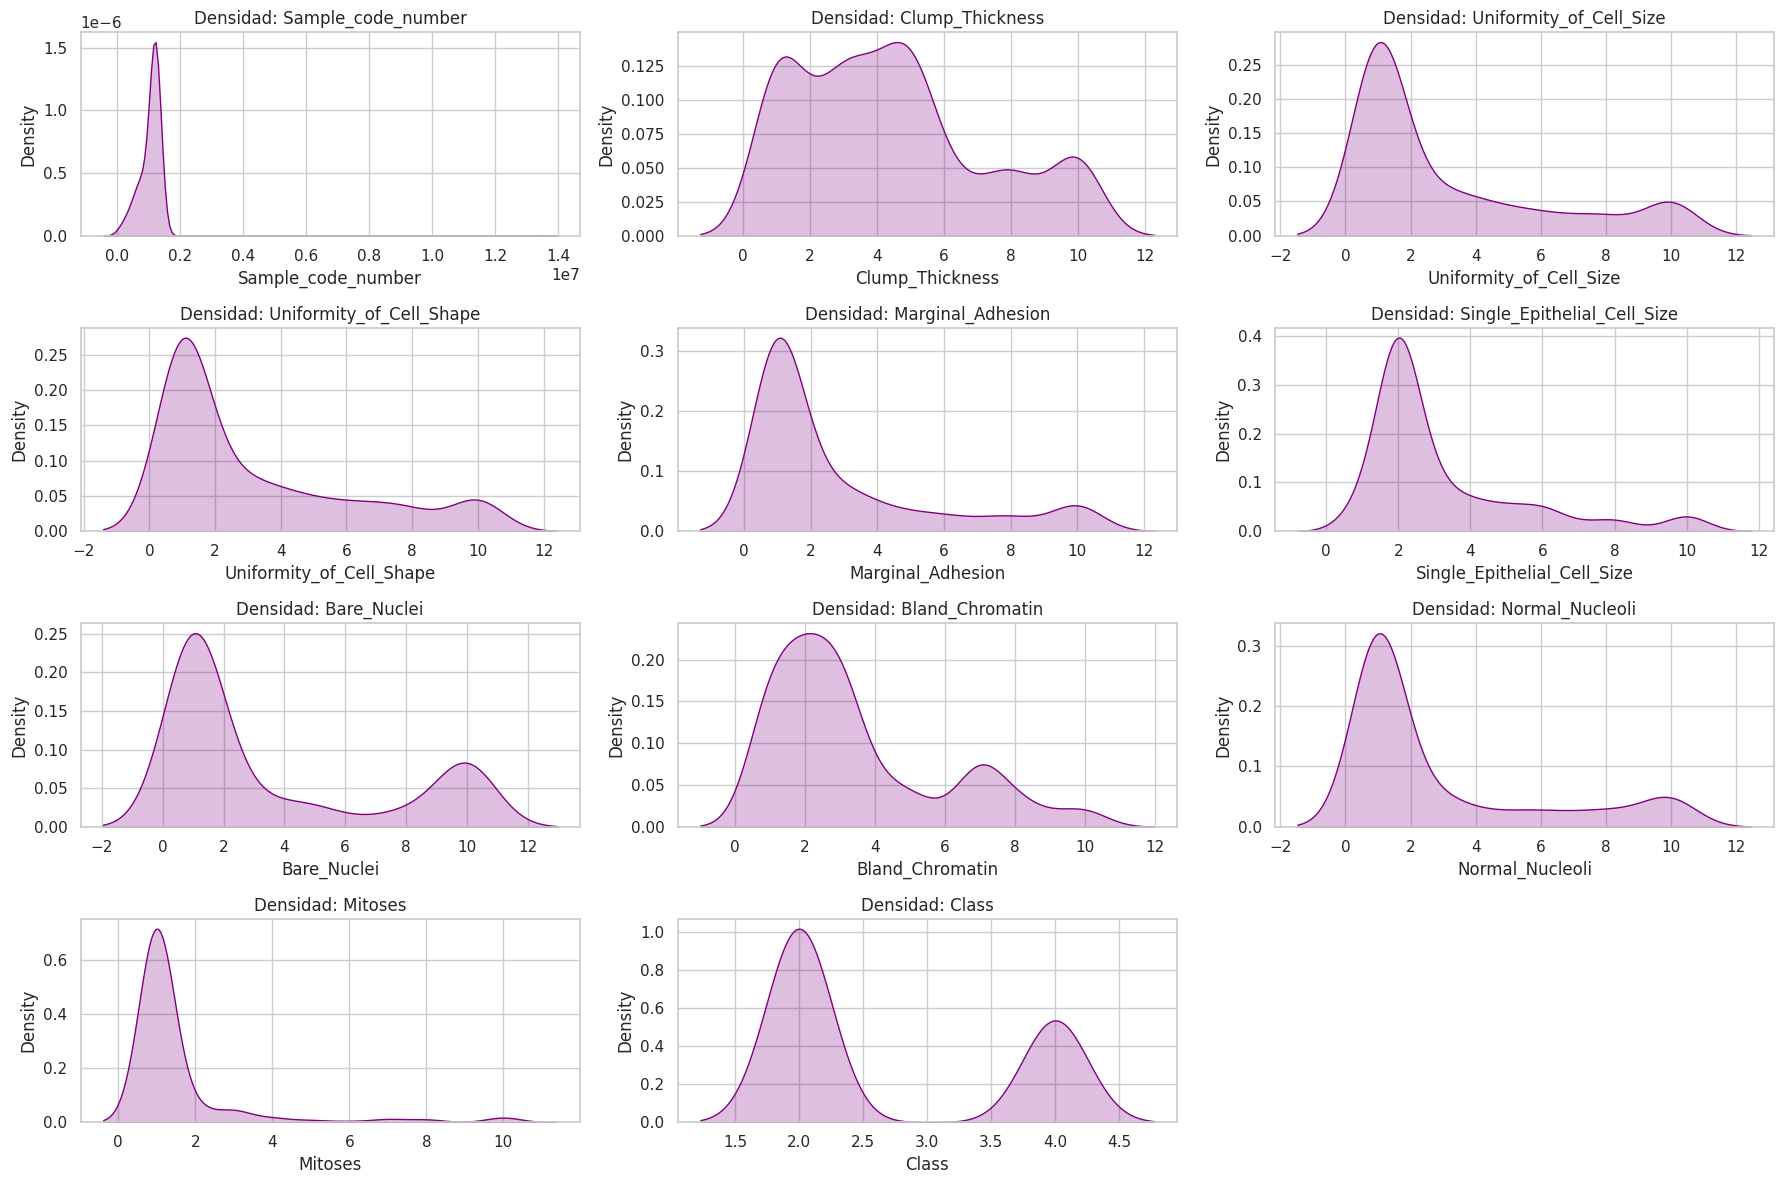

In [13]:
plt.figure(figsize=(18, 12))
for i, column in enumerate(numeric_vars.columns):  # Ya no excluye 'Class'
    plt.subplot(4, 3, i + 1)
    sns.kdeplot(data=numeric_vars[column], fill=True, color='purple')
    plt.title(f'Densidad: {column}')
plt.tight_layout()
plt.show()

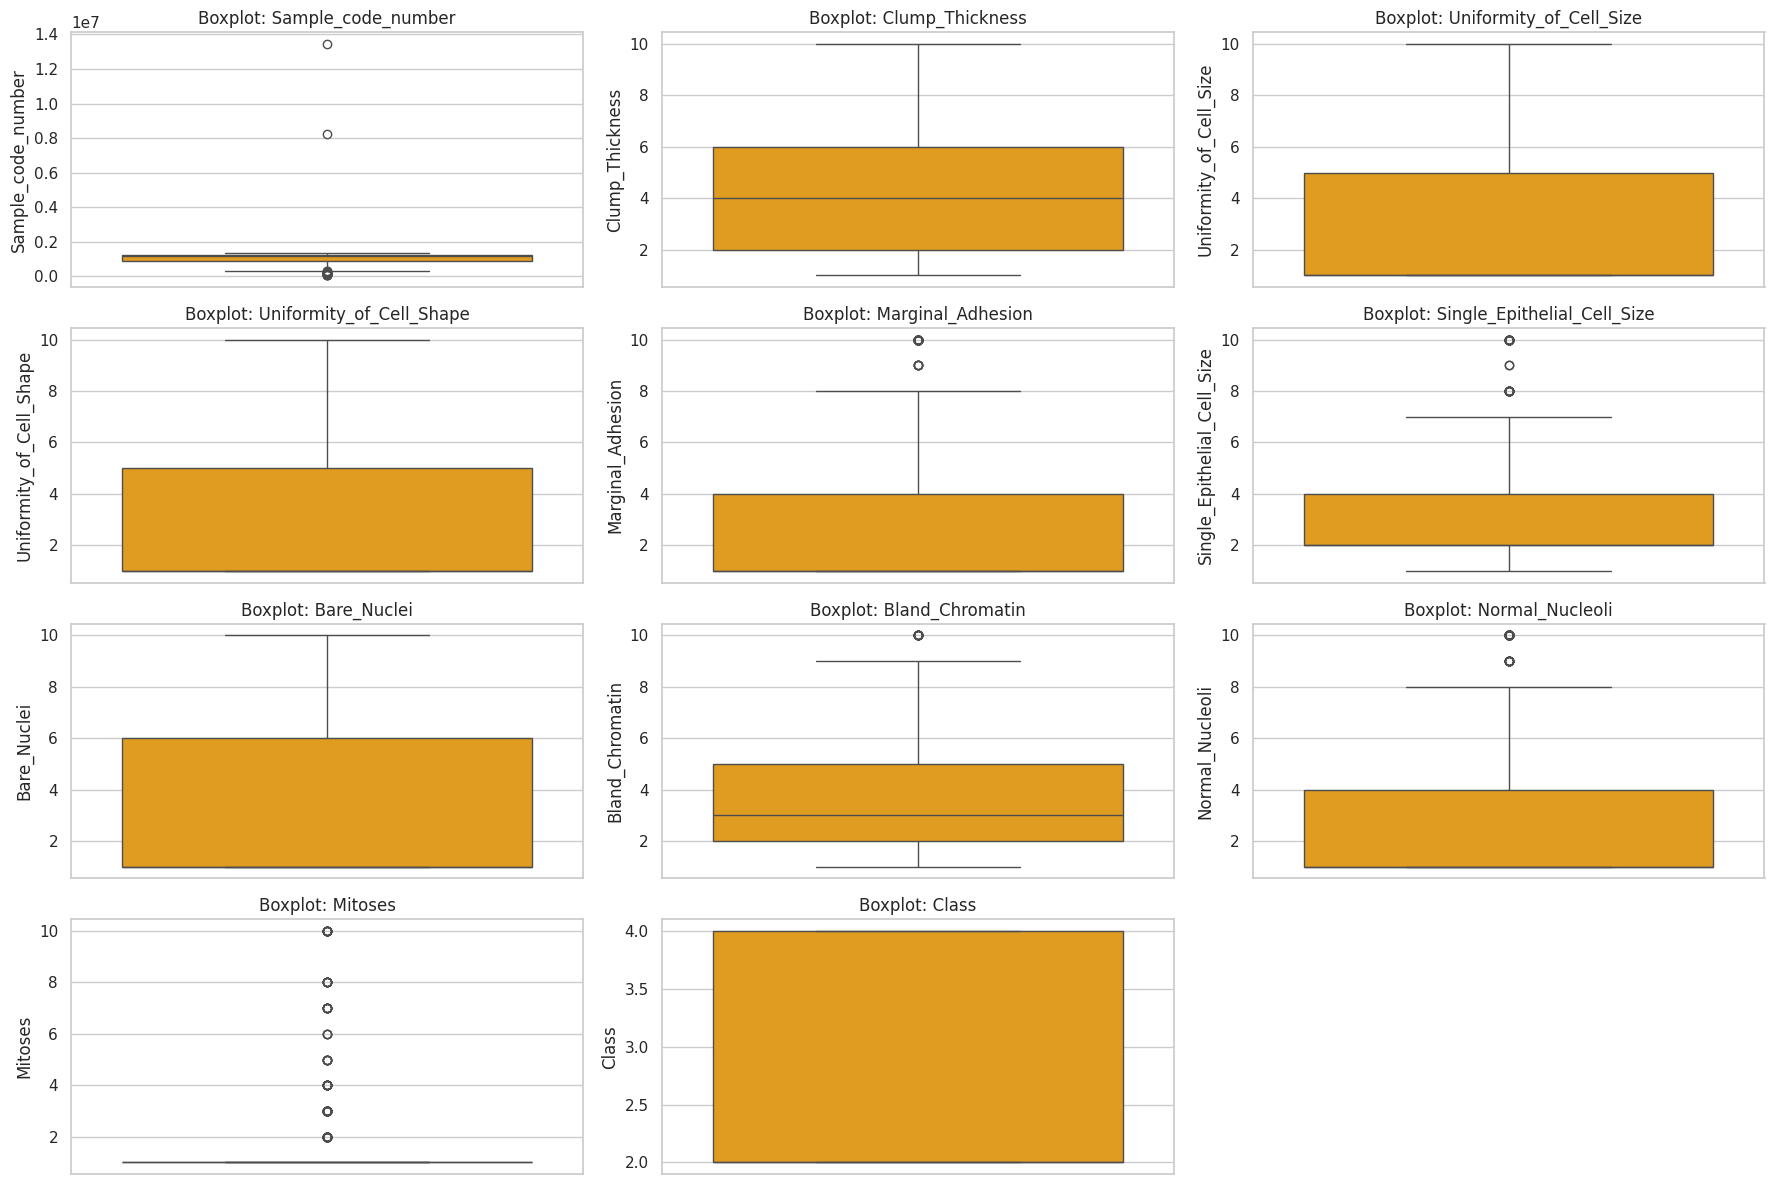

In [14]:
plt.figure(figsize=(18, 12))
for i, column in enumerate(numeric_vars.columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=numeric_vars[column], color='orange')
    plt.title(f'Boxplot: {column}')
plt.tight_layout()
plt.show()

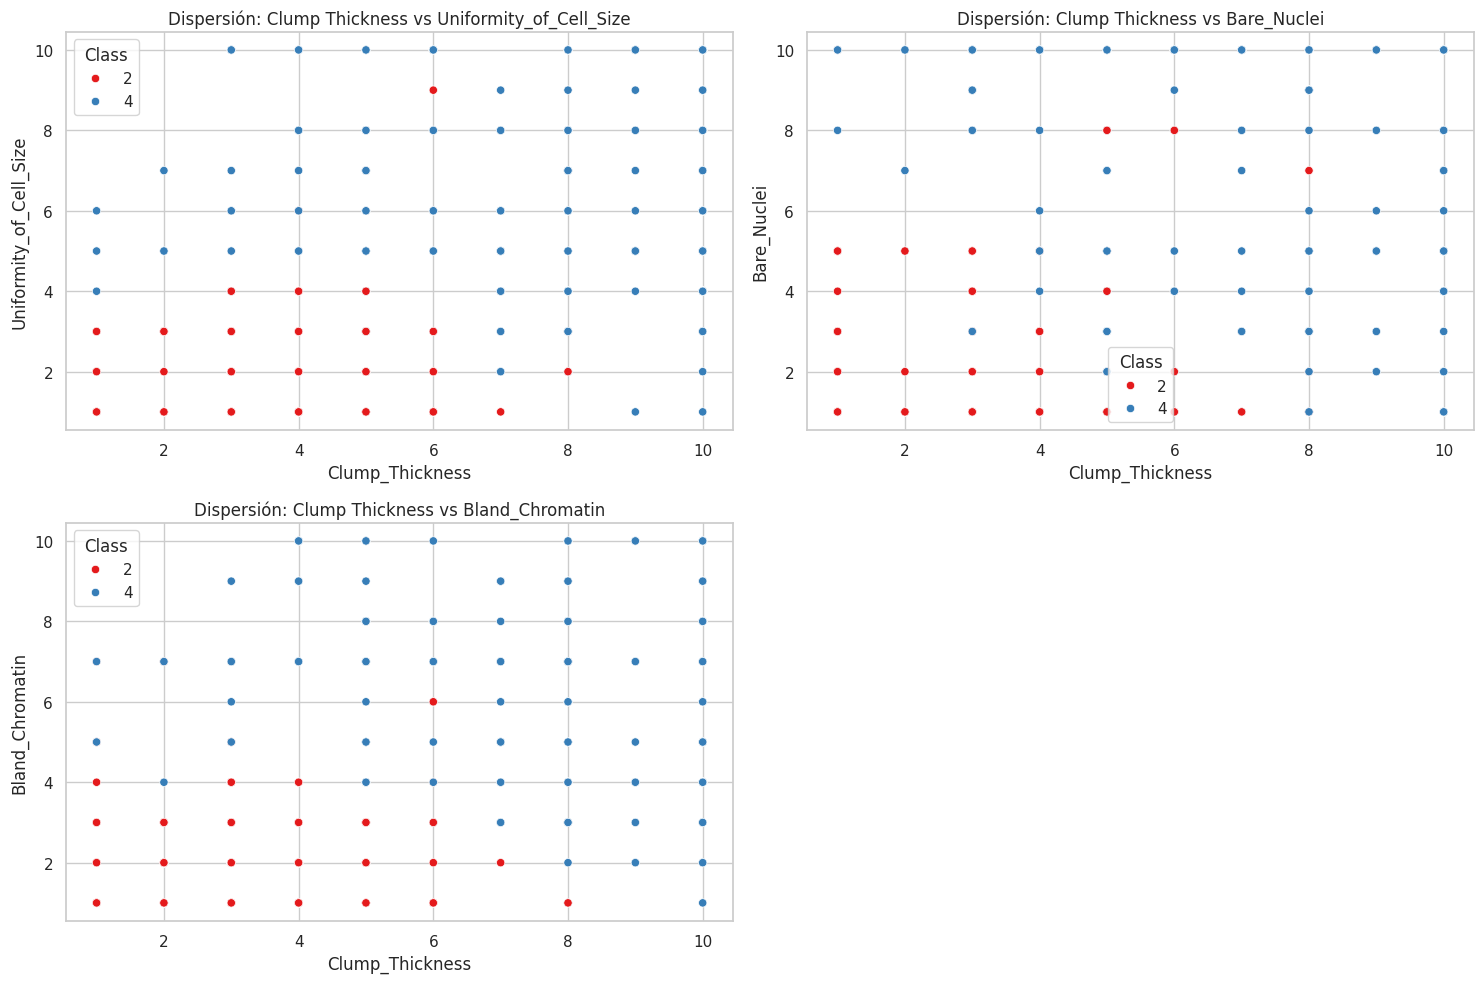

In [15]:
plt.figure(figsize=(15, 10))
scatter_vars = ['Uniformity_of_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin']

for i, column in enumerate(scatter_vars):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df, x='Clump_Thickness', y=column, hue='Class', palette='Set1')
    plt.title(f'Dispersión: Clump Thickness vs {column}')
    plt.legend(title='Class')

plt.tight_layout()
plt.show()

### **c. Utilice la librería 'Scikit-learn' para separar la información en datos de entrenamiento y prueba. Además, implemente un modelo k-NN con dicha información, realice pronósticos y mida la precisión para los datos de entrenamiento y prueba.**

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [23]:
# 1. Reemplazar '?' por NaN en la columna 'Bare_Nuclei'
df['Bare_Nuclei'].replace('?', np.nan, inplace=True)

<ipython-input-23-b1cf702df01f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bare_Nuclei'].replace('?', np.nan, inplace=True)


In [25]:
# 3. Eliminar filas con valores faltantes
df_clean = df.dropna()

In [26]:
# 4. Eliminar la columna 'Sample_code_number' (ID)
df_clean = df_clean.drop(columns=['Sample_code_number'])

In [27]:
# 5. Separar en X (features) e y (target)
X = df_clean.drop(columns='Class')
y = df_clean['Class']

In [28]:
# 6. Dividir en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# 7. Crear y entrenar el modelo k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
# 8. Predicciones
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [35]:
# 9. Precisión
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Precisión en entrenamiento: {acc_train:.4f}")
print(f"Precisión en prueba: {acc_test:.4f}")

Precisión en entrenamiento: 0.9744
Precisión en prueba: 0.9489
